In [1]:
from smart_open import open
import pickle as pk
import pandas as pd
import wordcloud as wc
import gensim as gs
import gensim.corpora as cp
import pyLDAvis.gensim
import pyLDAvis
import  matplotlib.pyplot as plt

In [2]:
df_tk_pre = pk.load( open( "./data/pre_df_tk.p", "rb" ) )

C:\Users\18199\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [3]:
df_tk_pre.head(5)

C:\Users\18199\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


ptitle  pscore     pid  \
0  [Pre-Match Thread] Porto vs Juventusntus (Cham...    64.0  lls3ua   
1  [Pre-Match Thread] Porto vs Juventusntus (Cham...    64.0  lls3ua   
2  [Pre-Match Thread] Porto vs Juventusntus (Cham...    64.0  lls3ua   
3  [Pre-Match Thread] Porto vs Juventusntus (Cham...    64.0  lls3ua   
4  [Pre-Match Thread] Porto vs Juventusntus (Cham...    64.0  lls3ua   

                                               pbody      pcreated  \
0  **Porto vs Juventus**\n\nCompetition: UEFA Cha...  1.613589e+09   
1  **Porto vs Juventus**\n\nCompetition: UEFA Cha...  1.613589e+09   
2  **Porto vs Juventus**\n\nCompetition: UEFA Cha...  1.613589e+09   
3  **Porto vs Juventus**\n\nCompetition: UEFA Cha...  1.613589e+09   
4  **Porto vs Juventus**\n\nCompetition: UEFA Cha...  1.613589e+09   

                                             comment       cauthor  \
0  [stop, sporting, winning, league, least, make,...        idek0k   
1  [dont, follow, liga, no, closely, portuguese, ...     kuzjaruge   
2  [go, porto, get, win, look, match, thread, pop...  TweakyWatson   
3  [shame, fan, allowed, stadium, think, would, l...   rabbitvinyl   
4  [juventusntus, take, easily, porto, fairly, de...    NunoxGames   

       ccreated       pcreated_date       ccreated_date     involved_teams  
0  1.613592e+09 2021-02-17 14:07:53 2021-02-17 15:07:27  Juventus vs Porto  
1  1.613590e+09 2021-02-17 14:07:53 2021-02-17 14:27:25  Juventus vs Porto  
2  1.613591e+09 2021-02-17 14:07:53 2021-02-17 14:36:02  Juventus vs Porto  
3  1.613596e+09 2021-02-17 14:07:53 2021-02-17 16:04:36  Juventus vs Porto  
4  1.613591e+09 2021-02-17 14:07:53 2021-02-17 14:41:04  Juventus vs Porto

# **By All**

## **Word Cloud**

In [4]:
all_words = ''
for comment in df_tk_pre['comment']:
    all_words += ','.join(list(comment)) 
# all_words

C:\Users\18199\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [5]:
len(all_words)

C:\Users\18199\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


909205

In [6]:
wordcloud = wc.WordCloud(background_color="white", max_words=100000, contour_width=3, contour_color='steelblue')

C:\Users\18199\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [7]:
wordcloud.generate(all_words)

C:\Users\18199\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


C:\Users\18199\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


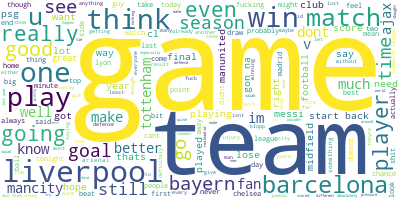

In [8]:
wordcloud.to_image()

## **Data Preparation**

In [9]:
all_words = []
for comment in df_tk_pre['comment']:
    all_words.append(comment)
# list(all_words)

C:\Users\18199\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [10]:
# Create dictionary and corpus
word2num = cp.Dictionary(all_words)
texts = all_words
word2num

C:\Users\18199\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [11]:
# Get term frequency
corpus = [word2num.doc2bow(text) for text in texts]
# corpus

C:\Users\18199\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## **LDA Model**

In [12]:
n_topics = 10
lda_model = gs.models.LdaMulticore(corpus=corpus, id2word=word2num, num_topics=n_topics)
doc_lda = lda_model[corpus]

C:\Users\18199\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [13]:
lda_model.print_topics()

C:\Users\18199\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0,
  '0.011*"im" + 0.010*"u" + 0.009*"na" + 0.009*"gon" + 0.008*"game" + 0.008*"one" + 0.007*"player" + 0.007*"go" + 0.006*"goal" + 0.006*"league"'),
 (1,
  '0.016*"team" + 0.015*"game" + 0.013*"liverpool" + 0.011*"win" + 0.010*"like" + 0.009*"barcelona" + 0.009*"fan" + 0.008*"goal" + 0.008*"match" + 0.007*"see"'),
 (2,
  '0.018*"think" + 0.016*"dont" + 0.014*"team" + 0.010*"liverpool" + 0.009*"see" + 0.009*"get" + 0.009*"game" + 0.007*"goal" + 0.006*"better" + 0.006*"last"'),
 (3,
  '0.014*"game" + 0.010*"win" + 0.008*"would" + 0.008*"match" + 0.008*"team" + 0.007*"going" + 0.006*"ajax" + 0.006*"lol" + 0.006*"liverpool" + 0.006*"im"'),
 (4,
  '0.017*"game" + 0.012*"liverpool" + 0.010*"win" + 0.009*"would" + 0.009*"barcelona" + 0.008*"one" + 0.007*"match" + 0.007*"player" + 0.007*"think" + 0.007*"im"'),
 (5,
  '0.014*"game" + 0.014*"like" + 0.008*"good" + 0.007*"season" + 0.007*"play" + 0.007*"still" + 0.007*"http" + 0.007*"he" + 0.007*"get" + 0.006*"last"'),
 (6,
  '0.025*"win" + 0.

In [14]:
for i in range(0, len(corpus), 500):
    for index, score in sorted(lda_model[corpus[i]], key=lambda tup: -1*tup[1]):
        print("\nScore: {}\t \nTopic: {}".format(score, lda_model.print_topic(index, 10)))

C:\Users\18199\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



Score: 0.5364884734153748	 
Topic: 0.011*"im" + 0.010*"u" + 0.009*"na" + 0.009*"gon" + 0.008*"game" + 0.008*"one" + 0.007*"player" + 0.007*"go" + 0.006*"goal" + 0.006*"league"

Score: 0.3967794179916382	 
Topic: 0.016*"team" + 0.015*"game" + 0.013*"liverpool" + 0.011*"win" + 0.010*"like" + 0.009*"barcelona" + 0.009*"fan" + 0.008*"goal" + 0.008*"match" + 0.007*"see"

Score: 0.9307374954223633	 
Topic: 0.011*"im" + 0.010*"u" + 0.009*"na" + 0.009*"gon" + 0.008*"game" + 0.008*"one" + 0.007*"player" + 0.007*"go" + 0.006*"goal" + 0.006*"league"

Score: 0.8198358416557312	 
Topic: 0.014*"game" + 0.010*"win" + 0.008*"would" + 0.008*"match" + 0.008*"team" + 0.007*"going" + 0.006*"ajax" + 0.006*"lol" + 0.006*"liverpool" + 0.006*"im"

Score: 0.0200231671333313	 
Topic: 0.016*"team" + 0.015*"game" + 0.013*"liverpool" + 0.011*"win" + 0.010*"like" + 0.009*"barcelona" + 0.009*"fan" + 0.008*"goal" + 0.008*"match" + 0.007*"see"

Score: 0.02002054452896118	 
Topic: 0.015*"liverpool" + 0.015*"good" + 0.

Topic: 0.018*"think" + 0.016*"dont" + 0.014*"team" + 0.010*"liverpool" + 0.009*"see" + 0.009*"get" + 0.009*"game" + 0.007*"goal" + 0.006*"better" + 0.006*"last"

Score: 0.010008750483393669	 
Topic: 0.014*"game" + 0.014*"like" + 0.008*"good" + 0.007*"season" + 0.007*"play" + 0.007*"still" + 0.007*"http" + 0.007*"he" + 0.007*"get" + 0.006*"last"

Score: 0.010008633136749268	 
Topic: 0.016*"team" + 0.015*"game" + 0.013*"liverpool" + 0.011*"win" + 0.010*"like" + 0.009*"barcelona" + 0.009*"fan" + 0.008*"goal" + 0.008*"match" + 0.007*"see"

Score: 0.010008514858782291	 
Topic: 0.011*"im" + 0.010*"u" + 0.009*"na" + 0.009*"gon" + 0.008*"game" + 0.008*"one" + 0.007*"player" + 0.007*"go" + 0.006*"goal" + 0.006*"league"

Score: 0.010008242912590504	 
Topic: 0.014*"game" + 0.010*"win" + 0.008*"would" + 0.008*"match" + 0.008*"team" + 0.007*"going" + 0.006*"ajax" + 0.006*"lol" + 0.006*"liverpool" + 0.006*"im"

Score: 0.010007963515818119	 
Topic: 0.010*"win" + 0.008*"go" + 0.008*"think" + 0.008*"ti

Topic: 0.016*"team" + 0.015*"game" + 0.013*"liverpool" + 0.011*"win" + 0.010*"like" + 0.009*"barcelona" + 0.009*"fan" + 0.008*"goal" + 0.008*"match" + 0.007*"see"

Score: 0.02504511922597885	 
Topic: 0.014*"game" + 0.010*"win" + 0.008*"would" + 0.008*"match" + 0.008*"team" + 0.007*"going" + 0.006*"ajax" + 0.006*"lol" + 0.006*"liverpool" + 0.006*"im"

Score: 0.02504480816423893	 
Topic: 0.025*"win" + 0.018*"deleted" + 0.010*"game" + 0.009*"well" + 0.008*"get" + 0.008*"one" + 0.007*"liverpool" + 0.007*"want" + 0.007*"score" + 0.007*"team"

Score: 0.025044158101081848	 
Topic: 0.015*"liverpool" + 0.015*"good" + 0.013*"game" + 0.010*"would" + 0.007*"win" + 0.007*"team" + 0.007*"think" + 0.007*"get" + 0.007*"one" + 0.006*"like"

Score: 0.02504369057714939	 
Topic: 0.014*"like" + 0.011*"game" + 0.011*"really" + 0.008*"deleted" + 0.008*"time" + 0.008*"would" + 0.006*"one" + 0.006*"player" + 0.006*"team" + 0.006*"think"

Score: 0.025043627247214317	 
Topic: 0.017*"game" + 0.012*"liverpool" + 0

Topic: 0.014*"like" + 0.011*"game" + 0.011*"really" + 0.008*"deleted" + 0.008*"time" + 0.008*"would" + 0.006*"one" + 0.006*"player" + 0.006*"team" + 0.006*"think"

Score: 0.02000645361840725	 
Topic: 0.014*"game" + 0.014*"like" + 0.008*"good" + 0.007*"season" + 0.007*"play" + 0.007*"still" + 0.007*"http" + 0.007*"he" + 0.007*"get" + 0.006*"last"

Score: 0.020006412640213966	 
Topic: 0.016*"team" + 0.015*"game" + 0.013*"liverpool" + 0.011*"win" + 0.010*"like" + 0.009*"barcelona" + 0.009*"fan" + 0.008*"goal" + 0.008*"match" + 0.007*"see"

Score: 0.02000589296221733	 
Topic: 0.010*"win" + 0.008*"go" + 0.008*"think" + 0.008*"time" + 0.008*"team" + 0.007*"like" + 0.007*"match" + 0.006*"goal" + 0.006*"game" + 0.006*"going"

Score: 0.020005784928798676	 
Topic: 0.014*"game" + 0.010*"win" + 0.008*"would" + 0.008*"match" + 0.008*"team" + 0.007*"going" + 0.006*"ajax" + 0.006*"lol" + 0.006*"liverpool" + 0.006*"im"

Score: 0.020005635917186737	 
Topic: 0.017*"game" + 0.012*"liverpool" + 0.010*"win

Topic: 0.014*"game" + 0.010*"win" + 0.008*"would" + 0.008*"match" + 0.008*"team" + 0.007*"going" + 0.006*"ajax" + 0.006*"lol" + 0.006*"liverpool" + 0.006*"im"

Score: 0.01667218841612339	 
Topic: 0.017*"game" + 0.012*"liverpool" + 0.010*"win" + 0.009*"would" + 0.009*"barcelona" + 0.008*"one" + 0.007*"match" + 0.007*"player" + 0.007*"think" + 0.007*"im"

Score: 0.016671886667609215	 
Topic: 0.015*"liverpool" + 0.015*"good" + 0.013*"game" + 0.010*"would" + 0.007*"win" + 0.007*"team" + 0.007*"think" + 0.007*"get" + 0.007*"one" + 0.006*"like"

Score: 0.016671746969223022	 
Topic: 0.014*"game" + 0.014*"like" + 0.008*"good" + 0.007*"season" + 0.007*"play" + 0.007*"still" + 0.007*"http" + 0.007*"he" + 0.007*"get" + 0.006*"last"

Score: 0.016671497374773026	 
Topic: 0.014*"like" + 0.011*"game" + 0.011*"really" + 0.008*"deleted" + 0.008*"time" + 0.008*"would" + 0.006*"one" + 0.006*"player" + 0.006*"team" + 0.006*"think"

Score: 0.016671080142259598	 
Topic: 0.018*"think" + 0.016*"dont" + 0.014*

## **Topic Analysis**

In [15]:
pyLDAvis.enable_notebook()

C:\Users\18199\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [16]:
LDAvis_prepared = pyLDAvis.gensim.prepare(lda_model, corpus, word2num)

C:\Users\18199\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [17]:
LDAvis_prepared

C:\Users\18199\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2      0.008225 -0.001566       1        1  17.914147
9      0.004082  0.010186       2        1  13.972971
1      0.013620  0.000819       3        1  12.964224
5     -0.027166  0.009593       4        1   9.228224
8     -0.026183 -0.012858       5        1   8.974806
4      0.019410  0.023729       6        1   8.950372
6      0.055596 -0.072444       7        1   7.953203
0      0.014666  0.066055       8        1   7.164004
7      0.018305  0.005949       9        1   6.458142
3     -0.080556 -0.029463      10        1   6.419906, topic_info=         Term         Freq        Total Category  logprob  loglift
554   deleted   362.000000   362.000000  Default  30.0000  30.0000
32        win  1207.000000  1207.000000  Default  29.0000  29.0000
43       like  1066.000000  1066.000000  Default  28.0000  28.0000
143        na   289.000000   289.000000  Default  27.0000  27.0000
142       gon   273.000000   273.000000  Default  26.0000  26.0000
..        ...          ...          ...      ...      ...      ...
28         go    38.382704   568.531655  Topic10  -5.4796   0.0503
259      even    35.575451   577.862662  Topic10  -5.5556  -0.0419
111  football    30.867184   314.863978  Topic10  -5.6975   0.4233
178    bayern    32.271519   492.802094  Topic10  -5.6531   0.0198
43       like    33.765084  1066.115509  Topic10  -5.6078  -0.7066

[886 rows x 6 columns], token_table=       Topic      Freq                Term
term                                      
11711      9  0.756766  aaaaaamiiiiiiiiiis
950        1  0.063994          absolutely
950        2  0.343967          absolutely
950        3  0.199981          absolutely
950        4  0.111989          absolutely
...      ...       ...                 ...
3484       9  0.170570             zidanes
9945       6  0.812323                zijn
11446     10  0.776935              zonder
8083       2  0.227107                   つ
8083       6  0.681320                   つ

[2604 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 10, 2, 6, 9, 5, 7, 1, 8, 4])

In [18]:
pyLDAvis.save_html(LDAvis_prepared,'./html/lda_n10.html')

C:\Users\18199\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# *By Teams Against*

## **Word Cloud**

In [19]:
df_tk_pre.columns

C:\Users\18199\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Index(['ptitle', 'pscore', 'pid', 'pbody', 'pcreated', 'comment', 'cauthor',
       'ccreated', 'pcreated_date', 'ccreated_date', 'involved_teams'],
      dtype='object')

In [20]:
all_words = {}
all_words_str = {}
for team, comment in df_tk_pre.groupby('involved_teams')['comment']:
    all_words[team] = comment
    all_words_str[team] = ','.join(list(map(','.join, comment)))
# all_words_str

C:\Users\18199\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


C:\Users\18199\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



Ajax vs Juventus


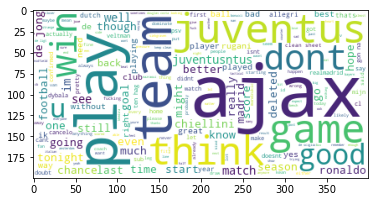


Ajax vs Liverpool


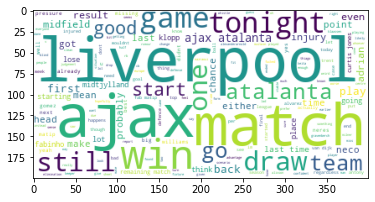


Ajax vs Tottenham


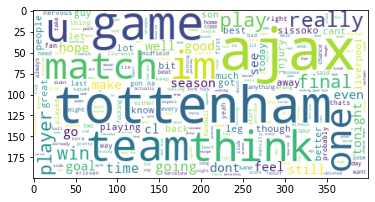


Arsenal vs Chelsea


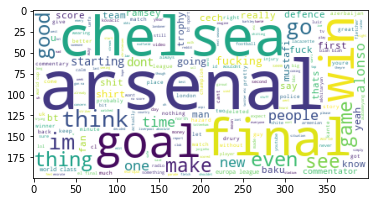


Arsenal vs ManCity


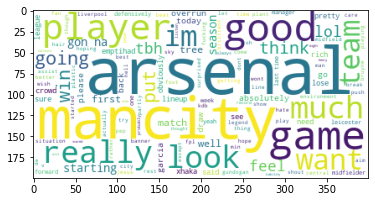


Arsenal vs ManUnited


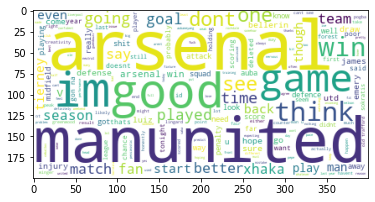


AtleticoMadrid vs Barcelona


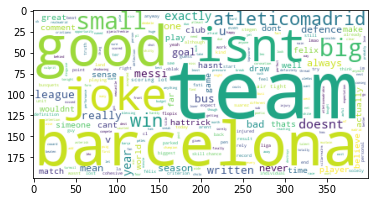


Barcelona vs Bayern


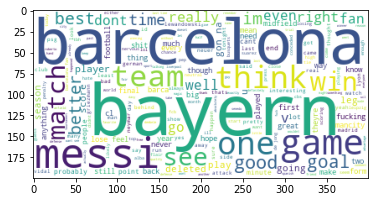


Barcelona vs Liverpool


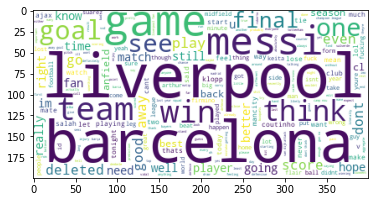


Barcelona vs Lyon


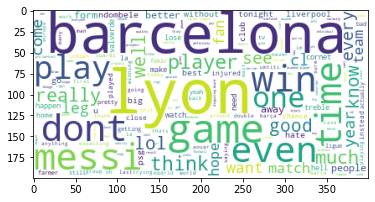


Barcelona vs ManUnited


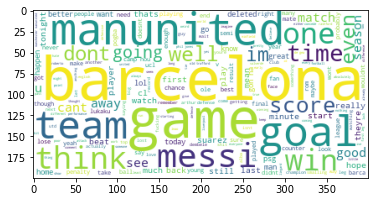


Barcelona vs Napoli


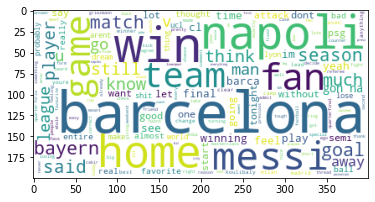


Barcelona vs RealMadrid


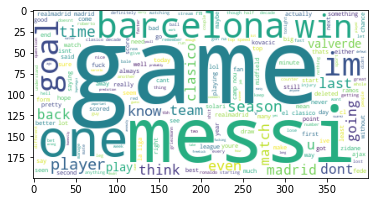


Bayern vs Chelsea


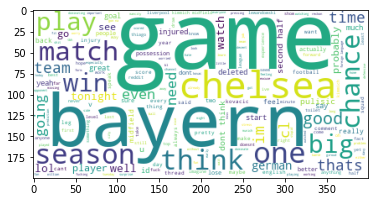


Bayern vs Liverpool


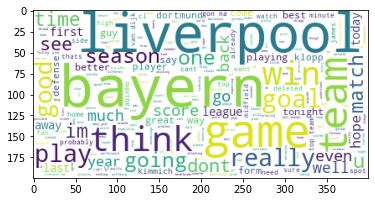


Bayern vs Lyon


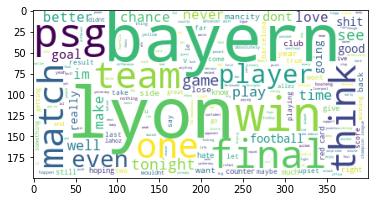


Bayern vs PSG


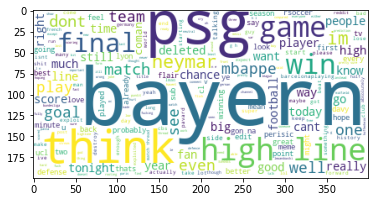


Chelsea vs Liverpool


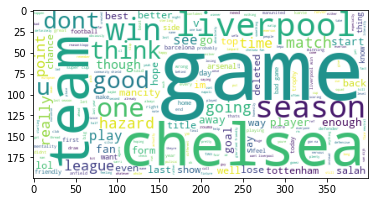


Chelsea vs ManUnited


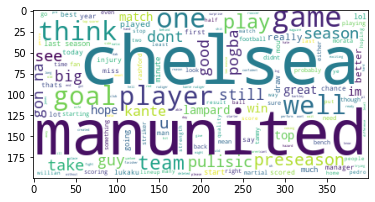


Dortmund vs PSG


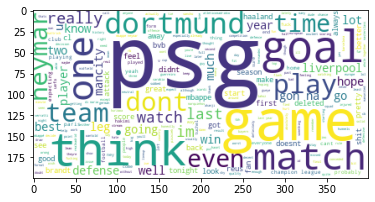


Dortmund vs Sevilla


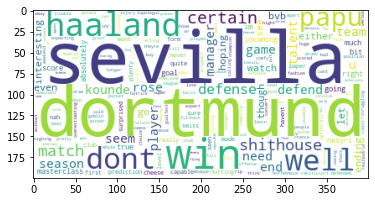


Inter vs Juventus


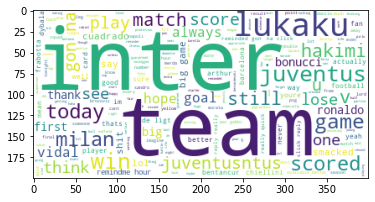


Inter vs Milan


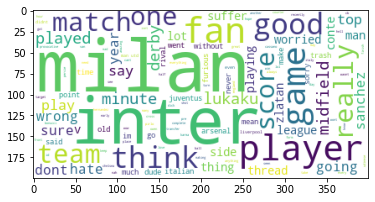


Inter vs RealMadrid


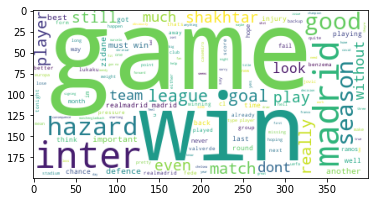


Inter vs Shakhtar


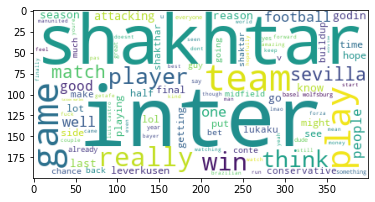


Juventus vs Napoli


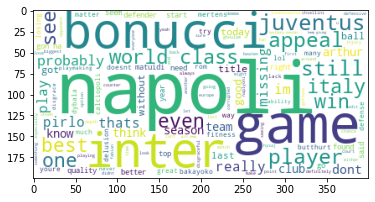


Juventus vs Porto


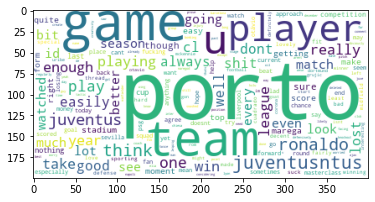


Juventus vs Roma


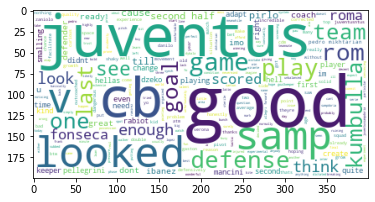


Leipzig vs Liverpool


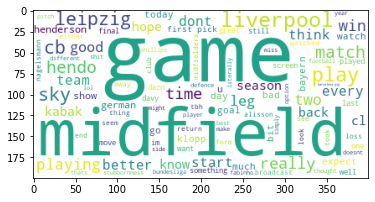


Leipzig vs PSG


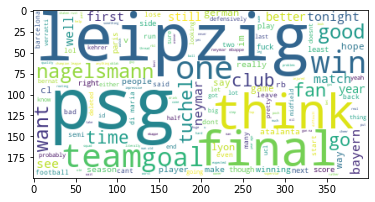


Liverpool vs ManCity


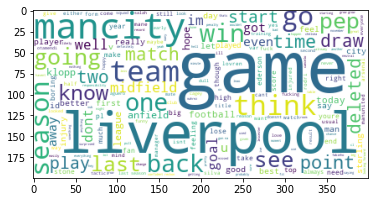


Liverpool vs ManUnited


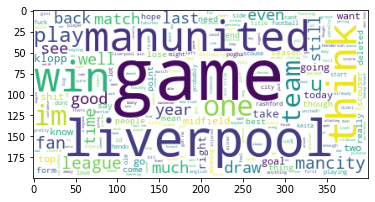


Liverpool vs RealMadrid


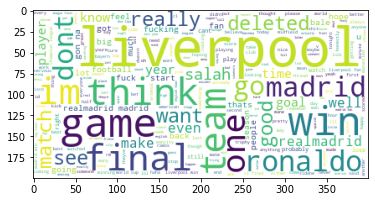


Liverpool vs Roma


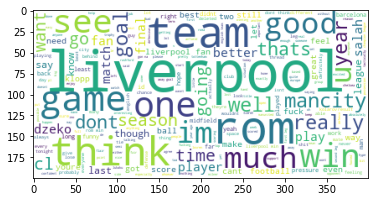


Liverpool vs Tottenham


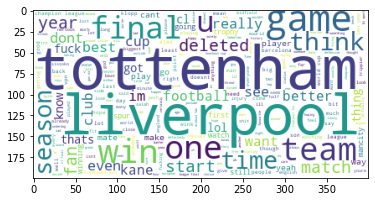


Lyon vs ManCity


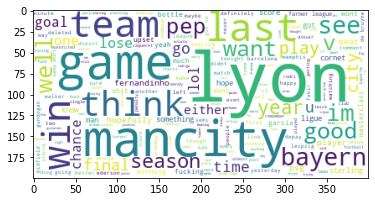


Lyon vs PSG


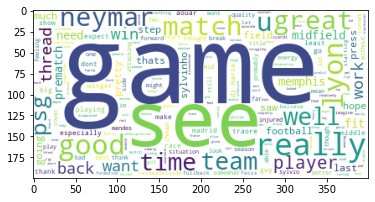


ManCity vs ManUnited


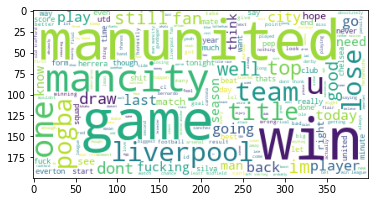


ManCity vs RealMadrid


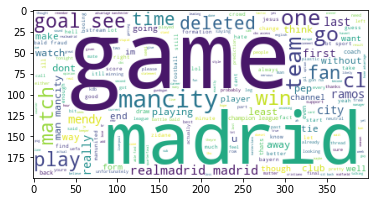


ManCity vs Tottenham


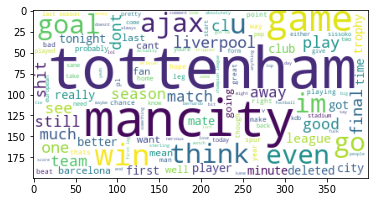


ManUnited vs Sevilla


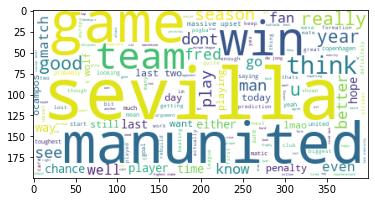

In [21]:
for key, value in all_words_str.items():
    print('\n' + key)
    wordcloud.generate(value)
    plt.imshow(wordcloud.to_image())
    plt.show()